# Don't forget to manually create train and val folders inside data folder. Otherwise, files will silently be discarded

In [10]:
import os
import cv2
import pandas as pd
import numpy as np

In [3]:
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
    # perform transformations on image
    b = cv2.distanceTransform(img, distanceType=cv2.DIST_L2, maskSize=5)
    g = cv2.distanceTransform(img, distanceType=cv2.DIST_L1, maskSize=5)
    r = cv2.distanceTransform(img, distanceType=cv2.DIST_C, maskSize=5)

    # merge the transformed channels back to an image
    transformed_image = cv2.merge((b, g, r))
    
    return transformed_image

In [3]:


root_dir = '../'#os.getcwd()
file_list = ['train.csv', 'val.csv']
image_source_dir = os.path.join(root_dir, 'data/images/')
data_root = os.path.join(root_dir, 'data')
for file in file_list:
    
    image_target_dir = os.path.join(data_root, file.split(".")[0])
    
    # read list of image files to process from file
    image_list = pd.read_csv(os.path.join(data_root, file), header=None)[0]
    
    print("Start preprocessing images")
    for image in image_list:
        # open image file
        img = cv2.imread(os.path.join(image_source_dir, image))
        transformed_image = preprocess_image(img)
        '''
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # perform transformations on image
        b = cv2.distanceTransform(img, distanceType=cv2.DIST_L2, maskSize=5)
        g = cv2.distanceTransform(img, distanceType=cv2.DIST_L1, maskSize=5)
        r = cv2.distanceTransform(img, distanceType=cv2.DIST_C, maskSize=5)
        
        # merge the transformed channels back to an image
        transformed_image = cv2.merge((b, g, r))
        '''
        target_file = os.path.join(image_target_dir, image)
        print("Writing target file {}".format(target_file))
        cv2.imwrite(target_file, transformed_image)

Start preprocessing images
Writing target file ../data/train/0101_003.png
Writing target file ../data/train/0110_099.png
Writing target file ../data/train/0113_013.png
Writing target file ../data/train/0140_007.png
Writing target file ../data/train/0146_281.png
Writing target file ../data/train/0146_281.png
Writing target file ../data/train/0147_090.png
Writing target file ../data/train/0147_090.png
Writing target file ../data/train/0147_125.png
Writing target file ../data/train/0147_125.png
Writing target file ../data/train/0147_256.png
Writing target file ../data/train/0147_256.png
Writing target file ../data/train/0148_271.png
Writing target file ../data/train/0148_479.png
Writing target file ../data/train/0151_180.png
Writing target file ../data/train/0151_208.png
Writing target file ../data/train/0154_080.png
Writing target file ../data/train/0154_474.png
Writing target file ../data/train/0155_081.png
Writing target file ../data/train/0199_384.png
Writing target file ../data/train

Writing target file ../data/train/2029_489.png
Writing target file ../data/train/2042_004.png
Writing target file ../data/train/2070_034.png
Writing target file ../data/train/2070_034.png
Writing target file ../data/train/2092_068.png
Writing target file ../data/train/2093_061.png
Writing target file ../data/train/2117_040.png
Writing target file ../data/train/2117_329.png
Writing target file ../data/train/2117_344.png
Writing target file ../data/train/2135_012.png
Writing target file ../data/train/2136_083.png
Writing target file ../data/train/2306_093.png
Writing target file ../data/train/5001_025.png
Writing target file ../data/train/5001_032.png
Writing target file ../data/train/5008_029.png
Writing target file ../data/train/5017_041.png
Writing target file ../data/train/5028_029.png
Writing target file ../data/train/5045_074.png
Writing target file ../data/train/5065_041.png
Writing target file ../data/train/5067_007.png
Writing target file ../data/train/5086_072.png
Writing targe

Writing target file ../data/train/9510_031.png
Writing target file ../data/train/9510_031.png
Writing target file ../data/train/9510_031.png
Writing target file ../data/train/9510_037.png
Writing target file ../data/train/9510_037.png
Writing target file ../data/train/9510_037.png
Writing target file ../data/train/9510_041.png
Writing target file ../data/train/9510_041.png
Writing target file ../data/train/9511_031.png
Writing target file ../data/train/9512_043.png
Writing target file ../data/train/9513_030.png
Writing target file ../data/train/9513_030.png
Writing target file ../data/train/9514_046.png
Writing target file ../data/train/9514_046.png
Writing target file ../data/train/9515_022.png
Writing target file ../data/train/9515_023.png
Writing target file ../data/train/9515_024.png
Writing target file ../data/train/9515_024.png
Writing target file ../data/train/9516_001.png
Writing target file ../data/train/9516_041.png
Writing target file ../data/train/9517_037.png
Writing targe

In [ ]:
!lumi dataset transform --type csv --data-dir ../data/ --output-dir tfdata/ --split train --split val --only-classes=table

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/

# _replace issue:
When creating config.yml, you need to add _replace in each dict. EAsiest way is to copy base_config.yml and edit what you want to change.
base_config.yml can be found at: /opt/anaconda3/lib/python3.6/site-packages/luminoth/models/<NETWORK NAME>
    
The definitive solution is to edit:
    /opt/anaconda3/lib/python3.6/site-packages/luminoth/utils/config.py at cleanup_config():
    
        for cleanup_key in cleanup_keys:
            if cleanup_key in config.keys():
                config.pop(cleanup_key, None)

In [ ]:
!lumi train -c config.yml

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/

INFO:tensorflow:Saving checkpoints for 3405 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3405, file: b'1356_083.png', train_loss: 2.830866575241089, in 8.91s
INFO:tensorflow:step: 3406, file: b'1662_034.png', train_loss: 2.717996835708618, in 7.97s
INFO:tensorflow:Saving checkpoints for 3407 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3407, file: b'1654_004.png', train_loss: 2.671165704727173, in 8.86s
INFO:tensorflow:step: 3408, file: b'0110_099.png', train_loss: 2.712207555770874, in 8.06s
INFO:tensorflow:Saving checkpoints for 3409 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3409, file: b'1060_195.png', train_loss: 2.7486984729766846, in 8.82s
INFO:tensorflow:step: 3410, file: b'1696_302.png', train_loss: 2.509047746658325, in 8.05s
INFO:tensorflow:Saving checkpoints for 3411 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3411, file: b'5171_016.png', train_loss: 2.606299161911

INFO:tensorflow:step: 3475, file: b'8013_494.png', train_loss: 2.587034225463867, in 8.86s
INFO:tensorflow:step: 3476, file: b'5252_009.png', train_loss: 3.030369281768799, in 7.97s
INFO:tensorflow:Saving checkpoints for 3477 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3477, file: b'1723_194.png', train_loss: 2.9876742362976074, in 8.92s
INFO:tensorflow:step: 3478, file: b'2042_004.png', train_loss: 2.577026605606079, in 8.10s
INFO:tensorflow:Saving checkpoints for 3479 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3479, file: b'2029_339.png', train_loss: 2.8835196495056152, in 8.87s
INFO:tensorflow:step: 3480, file: b'5095_019.png', train_loss: 2.4323623180389404, in 8.06s
INFO:tensorflow:global_step/sec: 0.116938
INFO:tensorflow:Saving checkpoints for 3481 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3481, file: b'5365_159.png', train_loss: 2.660116195678711, in 8.91s
INFO:tensorflow:step: 3482, file: b'

INFO:tensorflow:Saving checkpoints for 3535 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3535, file: b'5809_003.png', train_loss: 2.578991651535034, in 8.92s
INFO:tensorflow:step: 3536, file: b'5622_013.png', train_loss: 3.4359591007232666, in 8.08s
INFO:tensorflow:Saving checkpoints for 3537 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3537, file: b'5881_166.png', train_loss: 2.6141066551208496, in 8.91s
INFO:tensorflow:step: 3538, file: b'5670_054.png', train_loss: 3.028272867202759, in 8.01s
INFO:tensorflow:Saving checkpoints for 3539 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3539, file: b'5926_018.png', train_loss: 2.4139657020568848, in 8.87s
INFO:tensorflow:step: 3540, file: b'5045_074.png', train_loss: 3.0894248485565186, in 8.02s
INFO:tensorflow:Saving checkpoints for 3541 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3541, file: b'0212_175.png', train_loss: 2.214603662

INFO:tensorflow:step: 3595, file: b'5649_040.png', train_loss: 6.549759864807129, in 8.88s
INFO:tensorflow:step: 3596, file: b'9516_001.png', train_loss: 3.1747522354125977, in 8.06s
INFO:tensorflow:Saving checkpoints for 3597 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3597, file: b'5103_020.png', train_loss: 3.0336573123931885, in 8.83s
INFO:tensorflow:step: 3598, file: b'1124_024.png', train_loss: 2.799717664718628, in 8.01s
INFO:tensorflow:Saving checkpoints for 3599 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3599, file: b'9503_027.png', train_loss: 2.4665820598602295, in 8.84s
INFO:tensorflow:step: 3600, file: b'1539_012.png', train_loss: 2.5045130252838135, in 8.03s
INFO:tensorflow:Saving checkpoints for 3601 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3601, file: b'1896_369.png', train_loss: 2.608398675918579, in 8.90s
INFO:tensorflow:step: 3602, file: b'6814_006.png', train_loss: 2.731546163558

INFO:tensorflow:Saving checkpoints for 3655 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3655, file: b'9519_063.png', train_loss: 2.830885410308838, in 9.02s
INFO:tensorflow:step: 3656, file: b'9512_043.png', train_loss: 2.7774527072906494, in 8.07s
INFO:tensorflow:Saving checkpoints for 3657 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3657, file: b'6294_118.png', train_loss: 2.3042752742767334, in 8.77s
INFO:tensorflow:step: 3658, file: b'9525_043.png', train_loss: 3.3755276203155518, in 8.00s
INFO:tensorflow:Saving checkpoints for 3659 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3659, file: b'5848_023.png', train_loss: 2.6711578369140625, in 8.85s
INFO:tensorflow:step: 3660, file: b'0651_013.png', train_loss: 2.5317728519439697, in 7.99s
INFO:tensorflow:Saving checkpoints for 3661 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3661, file: b'5515_011.png', train_loss: 2.63122725

INFO:tensorflow:step: 3714, file: b'0147_090.png', train_loss: 2.908723831176758, in 8.07s
INFO:tensorflow:Saving checkpoints for 3715 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3715, file: b'8209_010.png', train_loss: 2.3526036739349365, in 8.82s
INFO:tensorflow:step: 3716, file: b'5611_010.png', train_loss: 2.5211851596832275, in 8.01s
INFO:tensorflow:Saving checkpoints for 3717 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3717, file: b'0725_043.png', train_loss: 3.2172465324401855, in 8.82s
INFO:tensorflow:step: 3718, file: b'2092_068.png', train_loss: 3.9877536296844482, in 8.00s
INFO:tensorflow:Saving checkpoints for 3719 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3719, file: b'5592_012.png', train_loss: 2.6880862712860107, in 8.78s
INFO:tensorflow:step: 3720, file: b'9526_017.png', train_loss: 2.6288843154907227, in 7.98s
INFO:tensorflow:Saving checkpoints for 3721 into ../jobs/table-area-detecti

INFO:tensorflow:step: 3773, file: b'5373_008.png', train_loss: 2.4582936763763428, in 8.87s
INFO:tensorflow:step: 3774, file: b'5086_072.png', train_loss: 4.271896839141846, in 8.03s
INFO:tensorflow:Saving checkpoints for 3775 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3775, file: b'0148_479.png', train_loss: 2.863553762435913, in 8.94s
INFO:tensorflow:step: 3776, file: b'0155_081.png', train_loss: 2.6409952640533447, in 8.06s
INFO:tensorflow:Saving checkpoints for 3777 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3777, file: b'9520_041.png', train_loss: 4.143985748291016, in 8.83s
INFO:tensorflow:step: 3778, file: b'2117_329.png', train_loss: 2.7271738052368164, in 8.01s
INFO:tensorflow:Saving checkpoints for 3779 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3779, file: b'0206_048.png', train_loss: 2.96205735206604, in 8.89s
INFO:tensorflow:step: 3780, file: b'0717_023.png', train_loss: 2.69000053405761

INFO:tensorflow:Saving checkpoints for 3833 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3833, file: b'1484_028.png', train_loss: 2.654444932937622, in 8.92s
INFO:tensorflow:step: 3834, file: b'5182_078.png', train_loss: 2.6184167861938477, in 8.09s
INFO:tensorflow:Saving checkpoints for 3835 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3835, file: b'2117_329.png', train_loss: 2.8570754528045654, in 8.88s
INFO:tensorflow:step: 3836, file: b'5191_015.png', train_loss: 2.6478946208953857, in 8.05s
INFO:tensorflow:Saving checkpoints for 3837 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3837, file: b'5112_044.png', train_loss: 2.7511842250823975, in 8.84s
INFO:tensorflow:step: 3838, file: b'5001_025.png', train_loss: 2.508072853088379, in 8.05s
INFO:tensorflow:Saving checkpoints for 3839 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3839, file: b'2010_019.png', train_loss: 3.166366577

INFO:tensorflow:step: 3892, file: b'5727_096.png', train_loss: 2.816984176635742, in 8.01s
INFO:tensorflow:Saving checkpoints for 3893 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3893, file: b'5412_028.png', train_loss: 2.3811020851135254, in 8.93s
INFO:tensorflow:step: 3894, file: b'1464_021.png', train_loss: 2.789776563644409, in 8.03s
INFO:tensorflow:Saving checkpoints for 3895 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3895, file: b'5848_023.png', train_loss: 3.585637331008911, in 8.86s
INFO:tensorflow:step: 3896, file: b'9534_058.png', train_loss: 2.978172540664673, in 7.91s
INFO:tensorflow:Saving checkpoints for 3897 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3897, file: b'1665_133.png', train_loss: 2.8631885051727295, in 8.82s
INFO:tensorflow:step: 3898, file: b'5680_035.png', train_loss: 2.7242980003356934, in 8.55s
INFO:tensorflow:Saving checkpoints for 3899 into ../jobs/table-area-detection-

INFO:tensorflow:step: 3951, file: b'5814_092.png', train_loss: 2.8611252307891846, in 8.82s
INFO:tensorflow:step: 3952, file: b'6294_118.png', train_loss: 2.8775830268859863, in 8.01s
INFO:tensorflow:Saving checkpoints for 3953 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3953, file: b'5925_025.png', train_loss: 2.7173805236816406, in 9.06s
INFO:tensorflow:step: 3954, file: b'1486_156.png', train_loss: 2.7591145038604736, in 8.03s
INFO:tensorflow:Saving checkpoints for 3955 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3955, file: b'9519_045.png', train_loss: 2.3526692390441895, in 8.87s
INFO:tensorflow:step: 3956, file: b'5955_103.png', train_loss: 3.8550667762756348, in 8.09s
INFO:tensorflow:Saving checkpoints for 3957 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 3957, file: b'6585_593.png', train_loss: 2.893160343170166, in 8.83s
INFO:tensorflow:step: 3958, file: b'1813_081.png', train_loss: 2.6045155525

INFO:tensorflow:Saving checkpoints for 4011 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4011, file: b'0146_281.png', train_loss: 2.9981155395507812, in 8.91s
INFO:tensorflow:step: 4012, file: b'9508_064.png', train_loss: 2.202371120452881, in 7.96s
INFO:tensorflow:Saving checkpoints for 4013 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4013, file: b'0210_111.png', train_loss: 2.705314874649048, in 8.85s
INFO:tensorflow:step: 4014, file: b'0223_017.png', train_loss: 2.6110148429870605, in 8.01s
INFO:tensorflow:Saving checkpoints for 4015 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4015, file: b'1156_004.png', train_loss: 2.9603543281555176, in 8.90s
INFO:tensorflow:step: 4016, file: b'1289_014.png', train_loss: 2.652711868286133, in 8.01s
INFO:tensorflow:Saving checkpoints for 4017 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4017, file: b'0113_013.png', train_loss: 2.8065447807

INFO:tensorflow:step: 4070, file: b'1295_064.png', train_loss: 2.851515769958496, in 7.93s
INFO:tensorflow:Saving checkpoints for 4071 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4071, file: b'1672_069.png', train_loss: 2.5144333839416504, in 8.86s
INFO:tensorflow:step: 4072, file: b'9534_058.png', train_loss: 2.824324607849121, in 7.97s
INFO:tensorflow:Saving checkpoints for 4073 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4073, file: b'1634_330.png', train_loss: 2.60077166557312, in 8.84s
INFO:tensorflow:step: 4074, file: b'9508_067.png', train_loss: 2.5647881031036377, in 8.01s
INFO:tensorflow:Saving checkpoints for 4075 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4075, file: b'1012_041.png', train_loss: 2.651028871536255, in 8.76s
INFO:tensorflow:step: 4076, file: b'9528_061.png', train_loss: 2.8752024173736572, in 8.02s
INFO:tensorflow:Saving checkpoints for 4077 into ../jobs/table-area-detection-0

INFO:tensorflow:step: 4129, file: b'1852_024.png', train_loss: 2.829378128051758, in 8.93s
INFO:tensorflow:step: 4130, file: b'0147_125.png', train_loss: 3.1835808753967285, in 7.95s
INFO:tensorflow:Saving checkpoints for 4131 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4131, file: b'1079_023.png', train_loss: 2.5254485607147217, in 8.86s
INFO:tensorflow:step: 4132, file: b'9520_037.png', train_loss: 2.5550153255462646, in 8.03s
INFO:tensorflow:Saving checkpoints for 4133 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4133, file: b'5001_025.png', train_loss: 2.5844902992248535, in 8.81s
INFO:tensorflow:step: 4134, file: b'5008_029.png', train_loss: 2.4880566596984863, in 7.99s
INFO:tensorflow:Saving checkpoints for 4135 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4135, file: b'1445_046.png', train_loss: 2.6216299533843994, in 8.87s
INFO:tensorflow:step: 4136, file: b'1634_022.png', train_loss: 2.3829441070

INFO:tensorflow:Saving checkpoints for 4189 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4189, file: b'5611_013.png', train_loss: 2.8298847675323486, in 8.79s
INFO:tensorflow:step: 4190, file: b'1551_123.png', train_loss: 2.425485134124756, in 8.03s
INFO:tensorflow:Saving checkpoints for 4191 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4191, file: b'1495_021.png', train_loss: 2.316894054412842, in 8.85s
INFO:tensorflow:step: 4192, file: b'1696_302.png', train_loss: 2.764192581176758, in 7.98s
INFO:tensorflow:Saving checkpoints for 4193 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4193, file: b'1852_024.png', train_loss: 2.5937843322753906, in 8.84s
INFO:tensorflow:step: 4194, file: b'5649_076.png', train_loss: 2.208415985107422, in 8.66s
INFO:tensorflow:Saving checkpoints for 4195 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4195, file: b'5830_164.png', train_loss: 2.40311360359

INFO:tensorflow:step: 4248, file: b'9523_038.png', train_loss: 2.7356345653533936, in 7.93s
INFO:tensorflow:Saving checkpoints for 4249 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4249, file: b'5685_032.png', train_loss: 2.343052387237549, in 8.88s
INFO:tensorflow:step: 4250, file: b'6585_484.png', train_loss: 3.3400559425354004, in 8.02s
INFO:tensorflow:Saving checkpoints for 4251 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4251, file: b'9504_025.png', train_loss: 2.3155040740966797, in 8.79s
INFO:tensorflow:step: 4252, file: b'1723_250.png', train_loss: 2.446521043777466, in 8.01s
INFO:tensorflow:Saving checkpoints for 4253 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4253, file: b'9500_023.png', train_loss: 2.2999603748321533, in 8.92s
INFO:tensorflow:step: 4254, file: b'5680_035.png', train_loss: 2.5529873371124268, in 7.98s
INFO:tensorflow:Saving checkpoints for 4255 into ../jobs/table-area-detectio

INFO:tensorflow:step: 4307, file: b'9522_055.png', train_loss: 2.7312979698181152, in 8.90s
INFO:tensorflow:step: 4308, file: b'5680_016.png', train_loss: 2.4404361248016357, in 8.01s
INFO:tensorflow:Saving checkpoints for 4309 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4309, file: b'9500_034.png', train_loss: 2.455684185028076, in 8.85s
INFO:tensorflow:step: 4310, file: b'1662_085.png', train_loss: 2.583573341369629, in 8.00s
INFO:tensorflow:Saving checkpoints for 4311 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4311, file: b'9501_022.png', train_loss: 2.306124210357666, in 8.77s
INFO:tensorflow:step: 4312, file: b'9528_061.png', train_loss: 2.825800895690918, in 8.03s
INFO:tensorflow:Saving checkpoints for 4313 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4313, file: b'0148_479.png', train_loss: 3.0754756927490234, in 8.84s
INFO:tensorflow:step: 4314, file: b'1551_152.png', train_loss: 2.7037267684936

INFO:tensorflow:Saving checkpoints for 4367 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4367, file: b'9506_017.png', train_loss: 2.4164063930511475, in 8.82s
INFO:tensorflow:step: 4368, file: b'9533_038.png', train_loss: 2.334571599960327, in 7.94s
INFO:tensorflow:Saving checkpoints for 4369 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4369, file: b'1289_014.png', train_loss: 2.609248399734497, in 8.89s
INFO:tensorflow:step: 4370, file: b'1060_195.png', train_loss: 2.548253059387207, in 8.03s
INFO:tensorflow:Saving checkpoints for 4371 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4371, file: b'1356_119.png', train_loss: 2.895418405532837, in 8.75s
INFO:tensorflow:step: 4372, file: b'5195_054.png', train_loss: 2.318915843963623, in 7.97s
INFO:tensorflow:Saving checkpoints for 4373 into ../jobs/table-area-detection-0.1/model.ckpt.
INFO:tensorflow:step: 4373, file: b'1368_074.png', train_loss: 2.369367361068

In [ ]:
!lumi checkpoint create config.yml

# _replace issue:
After checkpoint creation, config.yml is created under <USER/><HOME>/.luminoth/checkpoints/<Chkpnt num>/

It doesn't contain the _replace we added before to train config.yml

So copy config.yml to that directory

Abd replace:
    job_dir '.'
    run_name <CHKNT NUM>

In [7]:
!lumi predict --checkpoint f5de6620b730 ../data/val/9541_023.png

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/

# Predict on new image (cmd line)

In [55]:
import os
import cv2
# open image file
image = '9541_023.png'
image_source_dir = '../data/images/'
image_target_dir = '../'
img = cv2.imread(os.path.join(image_source_dir, image))
transformed_image = preprocess_image(img)

target_file = os.path.join(image_target_dir, 'transformed_'+ image)
print("Writing target file {}".format(target_file))
cv2.imwrite(target_file, transformed_image)

Writing target file ../transformed_9541_023.png


True

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

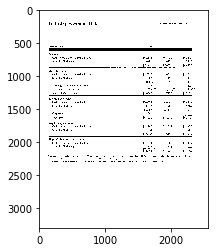

In [24]:
plt.imshow(img)

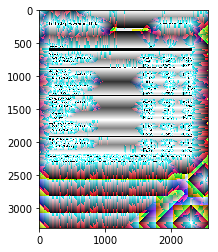

In [25]:
plt.imshow(transformed_image, cmap='gray')

In [26]:
!lumi predict --checkpoint f5de6620b730 ../data/val/9541_023.png

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/

In [27]:
!lumi predict --checkpoint f5de6620b730 ../transformed_9541_023.png


/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/importlib/

In [16]:
#!lumi server web --checkpoint f5de6620b730

In [36]:
def bbox2Points(bbox):
    box = np.zeros((4,2))
    box[0,:] = [bbox[2], bbox[3]] 
    box[1,:] = [bbox[0], bbox[3]]
    box[2,:] = [bbox[0], bbox[1]]
    box[3,:] = [bbox[2], bbox[1]]
    return box

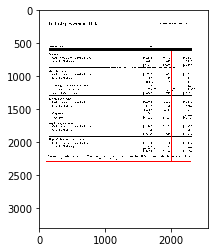

In [59]:
bbox = [100, 617, 2050, 2293]
box = bbox2Points(bbox).astype(np.int32)
#img = cv2.drawContours(img,[box],0,(0,0,255),2)
x = bbox[0]
y = bbox[1]
w = bbox[2] - bbox[0]
h = bbox[3] - bbox[1]
#cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255,0,0), 2)
plt.imshow(img, cmap='gray')

In [40]:
box

array([[2487, 2293],
       [   0, 2293],
       [   0,  617],
       [2487,  617]], dtype=int32)